# Generating and visualizing control experiments results in the paper: "Cochlear aqueduct advection and diffusion inferred from computed tomography imaging with a Bayesian approach"

**Note**: This code uses the following version of cuqipy:

In [1]:
import cuqi
print(cuqi.__version__)

1.5.0


## Run the code to generate the control experiments results
You can run the code for the control Bayesian inference experiment (presented in figure 2 in the paper) using the command lines shown below (documentation of the command line arguments can be found in the `README.md` file):

**Note:** Each one of the four runs below takes around 16 hours to complete, in practice, we run them simultaneously, each in a separate jobs on a cluster.

In [2]:
max_depth = 10 # Depth of the NUTS tree.
Ns = 2000 # Number of samples to draw from the posterior distribution.
Nb = 0 # Number of burn-in samples.

animal, ear = "m1", "r" # Which animal/ear case (to set observation locations, and boundary and initial conditions).
version = "control1" # Label of the inference, used to distinguish different runs.
sampler = "NUTSWithGibbs" # Sampler to use
unknown_par_type = "synth_diff1.npz" # Read the "true" diffusion coefficient" from this file.
unknown_par_value = 100.0 # Value of the diffusion coefficient (not used here since we read it from the file).
data_type = "synthetic" # Type of data to use, here we generate and use synthetic data.
inference_type = "heterogeneous" # Type of inference to perform, here we use heterogeneous to infer spatially varying diffusion coefficients.
num_CA = 5 # Number of CA data points to use, was set to 5 in the paper.
num_ST = 0 # Number of ST data points to use, was set to 0 in the paper.
rbc = "fromDataClip" # Use real data to set the right boundary conditions (clipping the negative values to zero).
noise_level = "std_0.5" # Noise level of the synthetic data, of std of 0.5
true_a = 0.0 # True advection coefficient.

# Lambda function to generate the command for running the inference script.
command_function = lambda inference_type, true_a: \
f"""
python code/advection_diffusion_inference.py -animal {animal} -ear {ear} -version {version} -sampler {sampler} -unknown_par_type {unknown_par_type} -unknown_par_value {unknown_par_value} -data_type {data_type} -inference_type {inference_type} -Ns {Ns} -Nb {Nb} -noise_level {noise_level} -num_CA {num_CA} -num_ST {num_ST} -true_a {true_a} -rbc {rbc} -NUTS_kwargs '{{"max_depth": {max_depth}, "step_size": 0.1}}' --data_grad  --sampler_callback  --adaptive"""

# Results for Figure 2, row 1.
# Tag to identify the saved files
file_tag_fig2_row1 = f"{animal}_{ear}_{sampler}_{unknown_par_type}_{unknown_par_value}_{data_type}_{inference_type}_{Ns}_{noise_level}_{version}__{num_ST}_{num_CA}_{true_a}_{rbc}"
# Command to run the inference script
command_fig2_row1 = command_function(inference_type, true_a)
# Run the command
#!{command_fig2_row1} # commented out to avoid running it automatically since it takes long time to run

# Results for Figure 2, row 2.
true_a = -1.0 # True advection coefficient.
inference_type = "advection_diffusion" # Type of inference to perform, here we infer both advection and diffusion coefficients.
# Tag to identify the saved files
file_tag_fig2_row2 = f"{animal}_{ear}_{sampler}_{unknown_par_type}_{unknown_par_value}_{data_type}_{inference_type}_{Ns}_{noise_level}_{version}__{num_ST}_{num_CA}_{true_a}_{rbc}"
# Command to run the inference script
command_fig2_row2 = command_function(inference_type, true_a)
# Run the command
#!{command_fig2_row2} # commented out to avoid running it automatically since it takes long time to run

# Results for Figure 2, row 3.
true_a = 0.5 # True advection coefficient.
# Tag to identify the saved files
file_tag_fig2_row3 = f"{animal}_{ear}_{sampler}_{unknown_par_type}_{unknown_par_value}_{data_type}_{inference_type}_{Ns}_{noise_level}_{version}__{num_ST}_{num_CA}_{true_a}_{rbc}" 
# Command to run the inference script
command_fig2_row3 = command_function(inference_type, true_a)
# Run the command
#!{command_fig2_row3} # commented out to avoid running it automatically since it takes long time to run

# Results for Figure 2, row 4.
true_a = 2.0 # True advection coefficient.
# Tag to identify the saved files
file_tag_fig2_row4 = f"{animal}_{ear}_{sampler}_{unknown_par_type}_{unknown_par_value}_{data_type}_{inference_type}_{Ns}_{noise_level}_{version}__{num_ST}_{num_CA}_{true_a}_{rbc}"
# Command to run the inference script
command_fig2_row4 = command_function(inference_type, true_a)
# Run the command
#!{command_fig2_row4} # commented out to avoid running it automatically since it takes long time to run


**Note:** to generate the appedix figures A1 and A2, you only need to replace `synth_diff1.npz` with `synth_diff2.npz` and `synth_diff3.npz`, respectively, in the command line arguments to get the corresponding "true" diffusion coefficients. You can also update the `-version` argument to `control2` and `control3`, respectively, for better organization of the results.

## Visualize the results

We first read the results generated by the code above. The results are stored in the `results` folder.

In [3]:
import sys

sys.path.append("code/")
from advection_diffusion_inference_utils import (
    read_all_control_scenarios,
    plot_control_case,
)
import os

In [4]:
results_directory = "results"
data_list_diff1 = read_all_control_scenarios(results_directory, [version]*4,
                                     [file_tag_fig2_row1,
                                      file_tag_fig2_row2,
                                      file_tag_fig2_row3,
                                      file_tag_fig2_row4])

Then we visualize the results:

/Users/amal/Documents/research_code/CUQI-DTU/Paper-Cochlear/code/advection_diffusion_inference_utils.py:1428: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.0)


ESS (min): 1115 ESS (mean): 1532 ESS (max): 1810
Inferred sigma noise mean:  0.5561835434921277
ESS (min): 1476 ESS (mean): 1620 ESS (max): 1798
Inferred sigma noise mean:  0.5588297056151359
ESS (min): 1309 ESS (mean): 1561 ESS (max): 1837
Inferred sigma noise mean:  0.5585565804304393
ESS (min): 1074 ESS (mean): 1597 ESS (max): 1866
Inferred sigma noise mean:  0.565197293582681


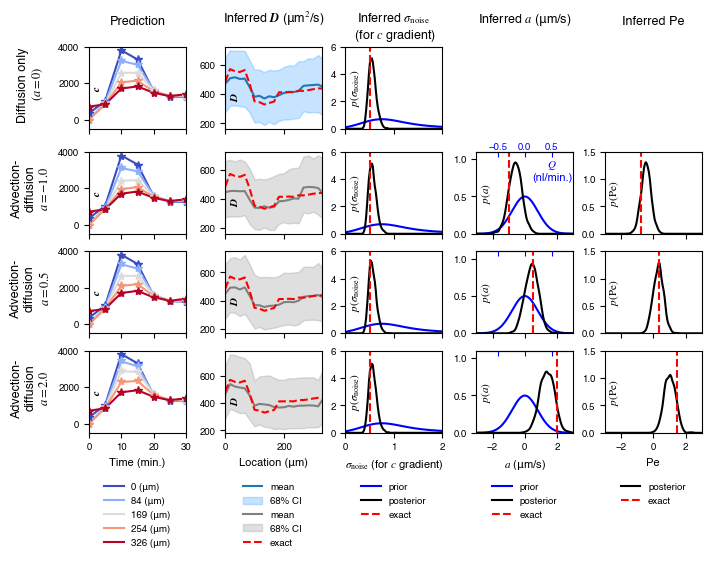

In [5]:
# Create plots directory 
if not os.path.exists(f'figures/{version}'):
    os.makedirs(f'figures/{version}')

import matplotlib.pyplot as plt
color_map_string = 'coolwarm' #'twilight' #'terrain'#'coolwarm'#'berlin' #'brg'
colormap=plt.colormaps.get_cmap(color_map_string)
plot_type='over_time' # over_time or over_location
plot_control_case(data_list_diff1, plot_type=plot_type, colormap=colormap)
plt.savefig(f'figures/{version}/{version}.pdf')